In [ ]:
# Achyuth Kumar
#achyuthkumar985@gmail.com

In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Reading the dataset

base_data = pd.read_csv('Data.csv')
print(base_data)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [4]:
base_data.shape

(110527, 14)

In [5]:
base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
base_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
base_data.info

<bound method DataFrame.info of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-

In [8]:
#modifying the date and time into standard form
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

For the schedule day and appointment day storing the weekdays only into a variable


In [9]:
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [10]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [11]:
base_data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [12]:
base_data['app_weekday'].value_counts()


app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [13]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [14]:
#Changing the Names of the Columns.

base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [15]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [16]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [17]:
# dropping some columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [18]:
print(base_data)

       Gender ScheduledDay AppointmentDay  Age  Scholarship  Hypertension  \
0           F   2016-04-29     2016-04-29   62            0             1   
1           M   2016-04-29     2016-04-29   56            0             0   
2           F   2016-04-29     2016-04-29   62            0             0   
3           F   2016-04-29     2016-04-29    8            0             0   
4           F   2016-04-29     2016-04-29   56            0             1   
...       ...          ...            ...  ...          ...           ...   
110522      F   2016-05-03     2016-06-07   56            0             0   
110523      F   2016-05-03     2016-06-07   51            0             0   
110524      F   2016-04-27     2016-06-07   21            0             0   
110525      F   2016-04-27     2016-06-07   38            0             0   
110526      F   2016-04-27     2016-06-07   54            0             0   

        Diabetes  Alcoholism  Handicap  SMSReceived NoShow  sch_weekday  \


In [19]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [20]:
base_data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


VISUALIZE

In [22]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(6, 5))
plt.xlabel("Count", labelpad=16)
plt.ylabel("Target of the Variable", labelpad=16)
plt.title("Count of TARGET vas/category", y=1.02);

In [23]:
# calculating the % of appointments or not 
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [24]:
base_data['NoShow'].value_counts()

NoShow
No     88208
Yes    22319
Name: count, dtype: int64

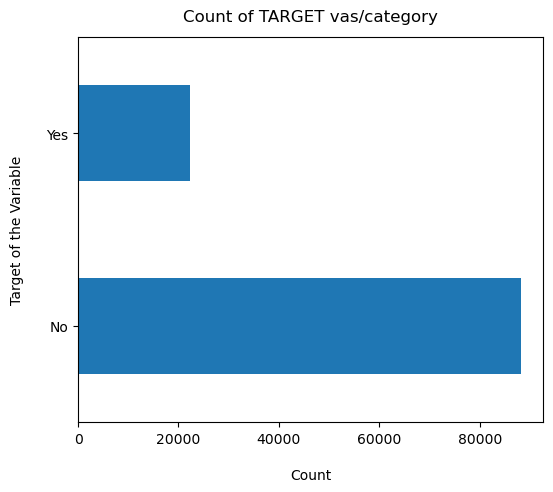

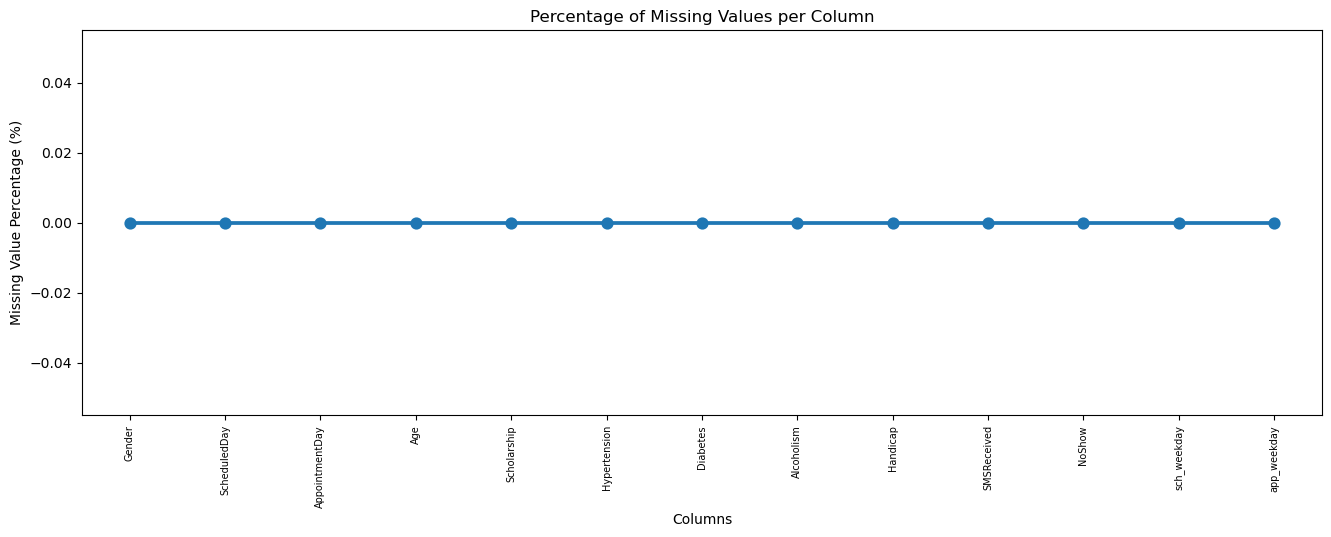

In [25]:
# Calculate % of missing values per column
missing = pd.DataFrame((base_data.isnull().sum()) * 100 / base_data.shape[0]).reset_index()
missing.columns = ['Column Name', 'Missing Percentage']  # rename for clarity

# Plot
plt.figure(figsize=(16, 5))
sns.pointplot(x='Column Name', y='Missing Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Missing Value Percentage (%)")
plt.xlabel("Columns")
plt.show()


## 🧩 Missing Data — Initial Intuition

After inspecting the dataset, we found **no missing values**.  
This indicates that the dataset is complete and ready for exploratory data analysis (EDA) without the need for imputation or feature removal.

---

## 📘 General Thumb Rules for Handling Missing Data

1. **For features with few missing values (typically < 5–10%)**  
   - Use **mean**, **median**, or **mode** imputation (depending on the feature type).  
   - Alternatively, use **regression** or **KNN imputation** for more accurate prediction of missing values.

2. **For features with moderate missing values (10–30%)**  
   - Check **feature importance** and **correlation** with the target variable.  
   - If important → perform **advanced imputation techniques** (e.g., iterative imputer).  
   - If less significant → consider **dropping only the missing rows**.

3. **For features with high missing values (> 30–40%)**  
   - Usually better to **drop the column** because:
     - Imputation introduces high uncertainty.
     - Such columns rarely contribute meaningful insights.
   - Example: If 50% of entries in a `Previous_Hospital_Visit` column are missing, the feature might not be reliable enough for analysis.

---


In [26]:
new_data = base_data.copy()

In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


**As we don't have any null records, there's no data cleaning required**

In [28]:
# Get the max tenure
print(base_data['Age'].max())

115


In [29]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [30]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

## ** DATA EXPLORATION **

In [31]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

In [32]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-01-27       1
2016-01-19       1
2016-06-04       1
2016-01-26       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Age ----------
Age

In [33]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)
base_data.NoShow.value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64

**Convert all the categorical variables into dummy variables**

In [34]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


**Build a corelation of all predictors with 'NoShow'**

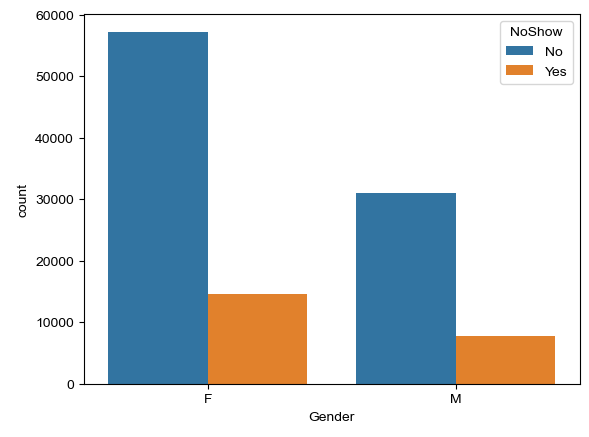

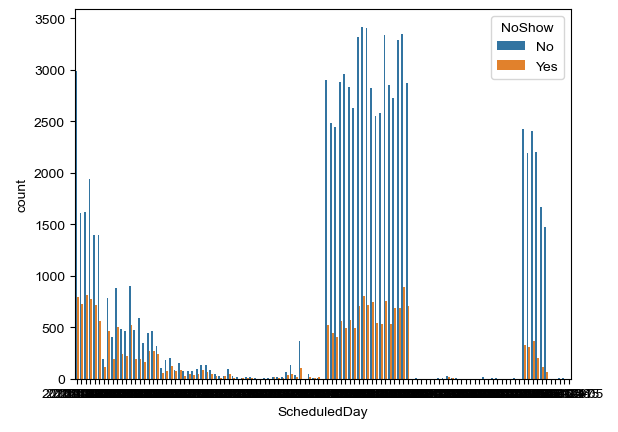

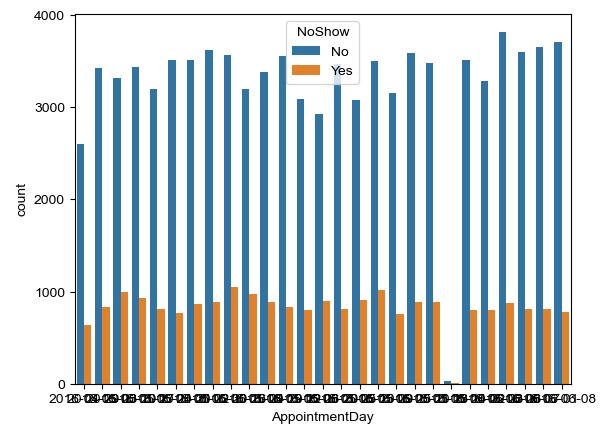

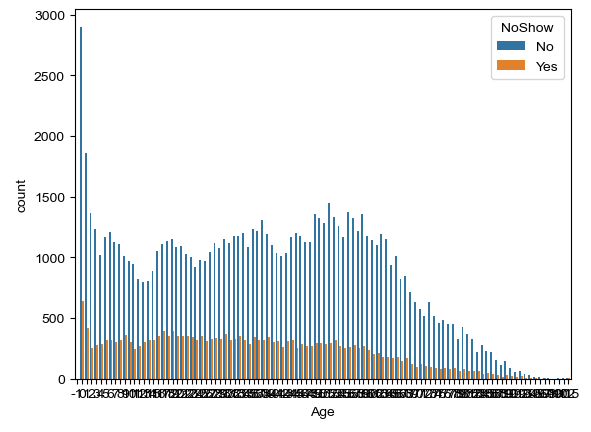

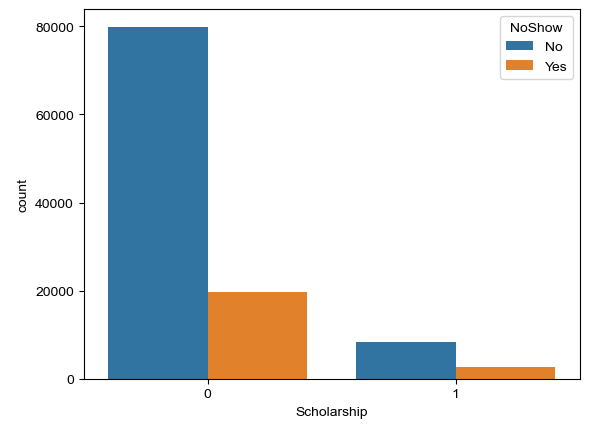

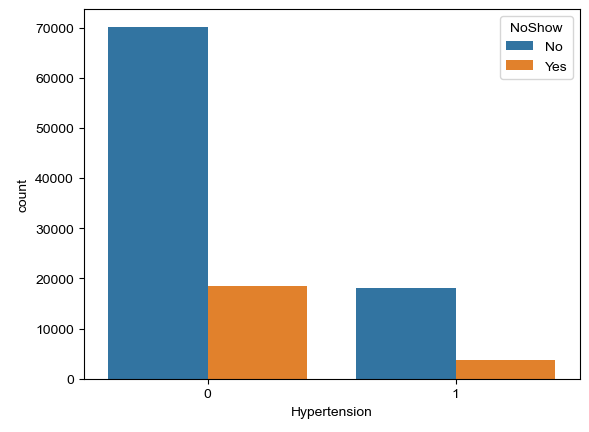

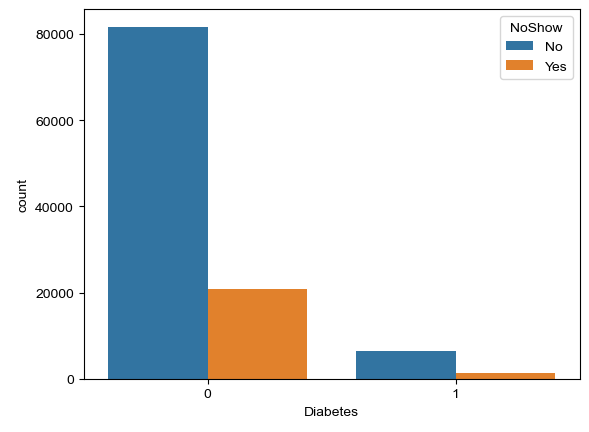

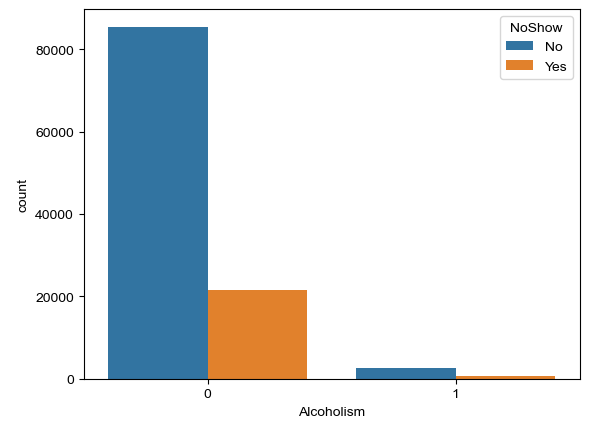

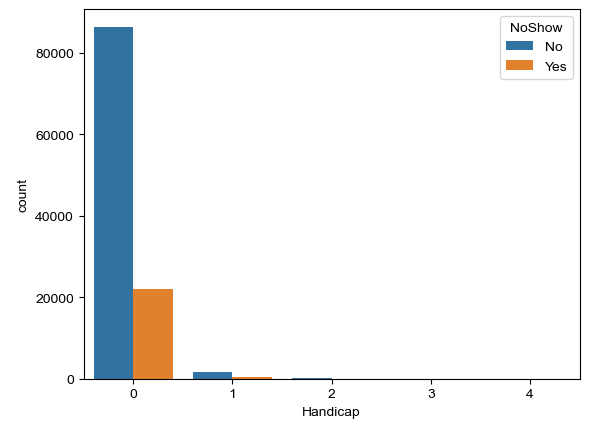

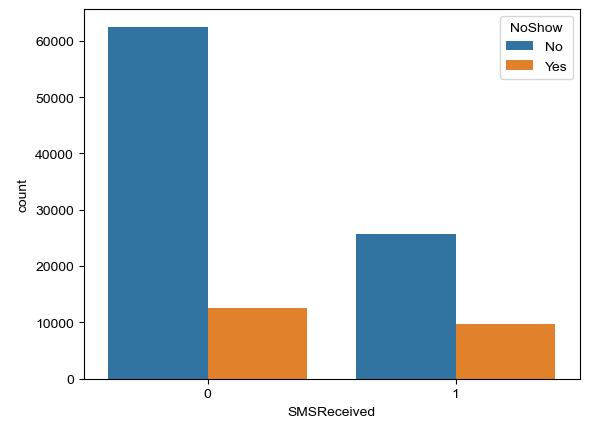

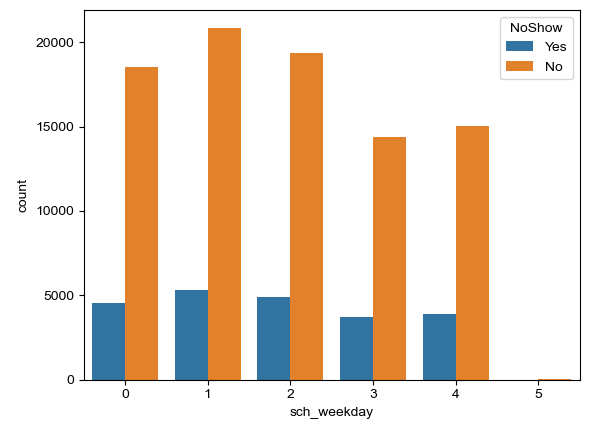

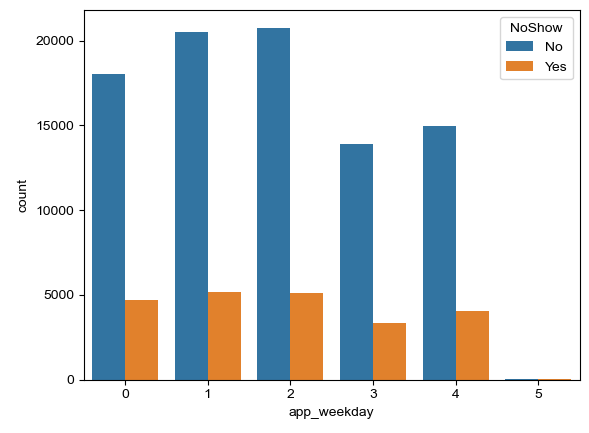

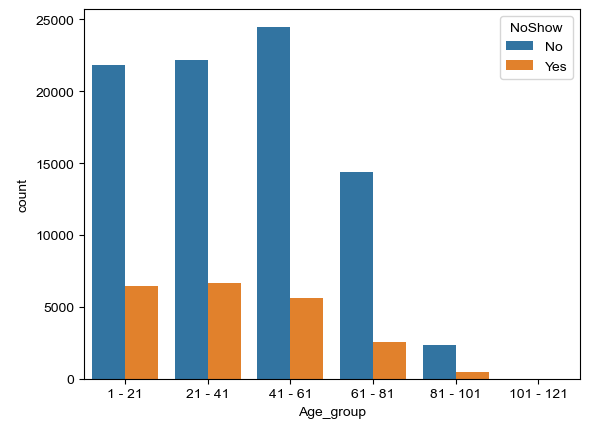

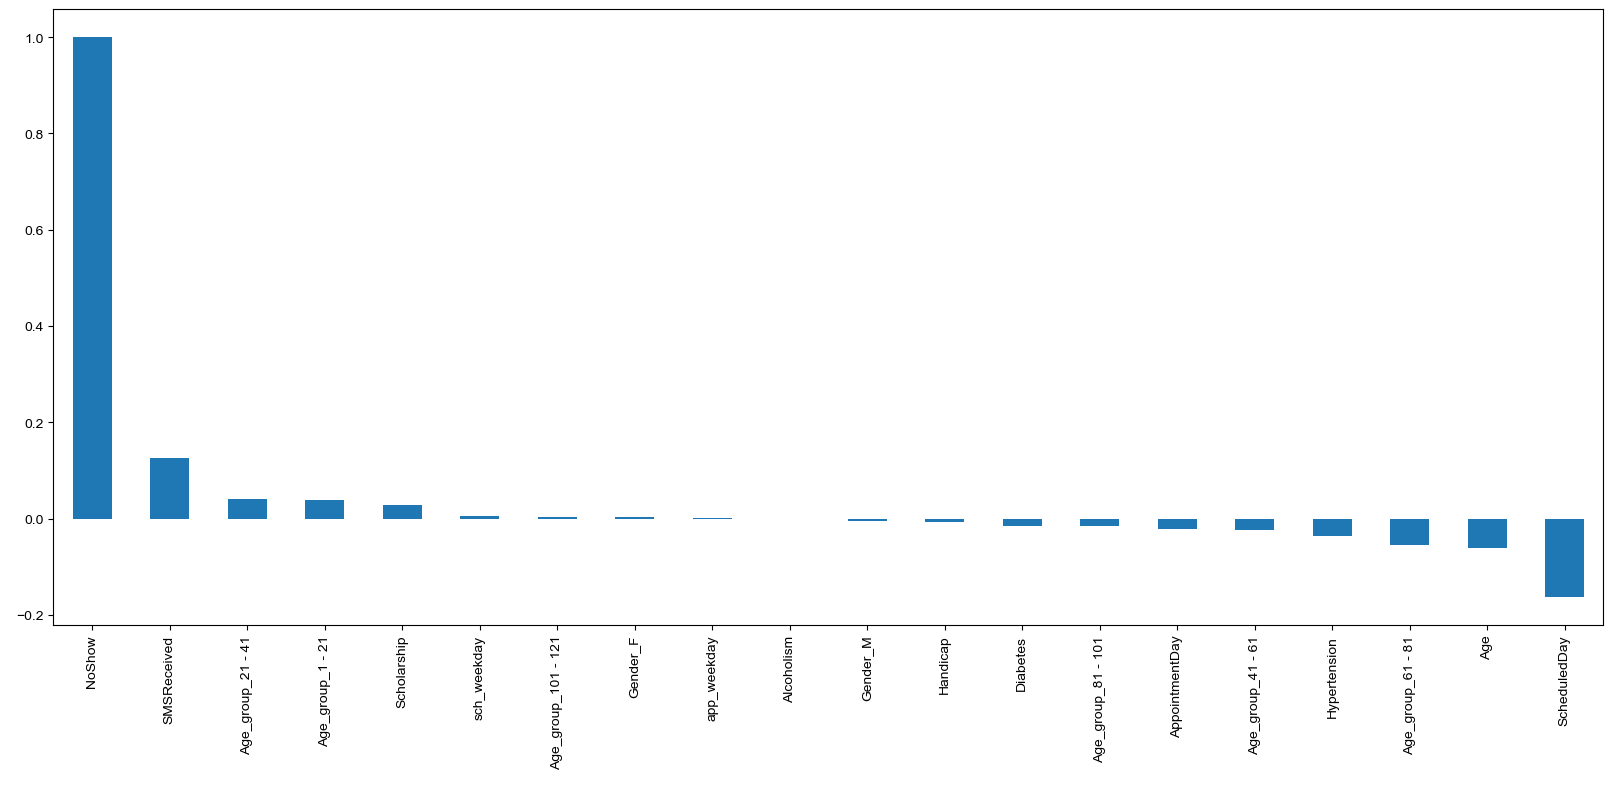

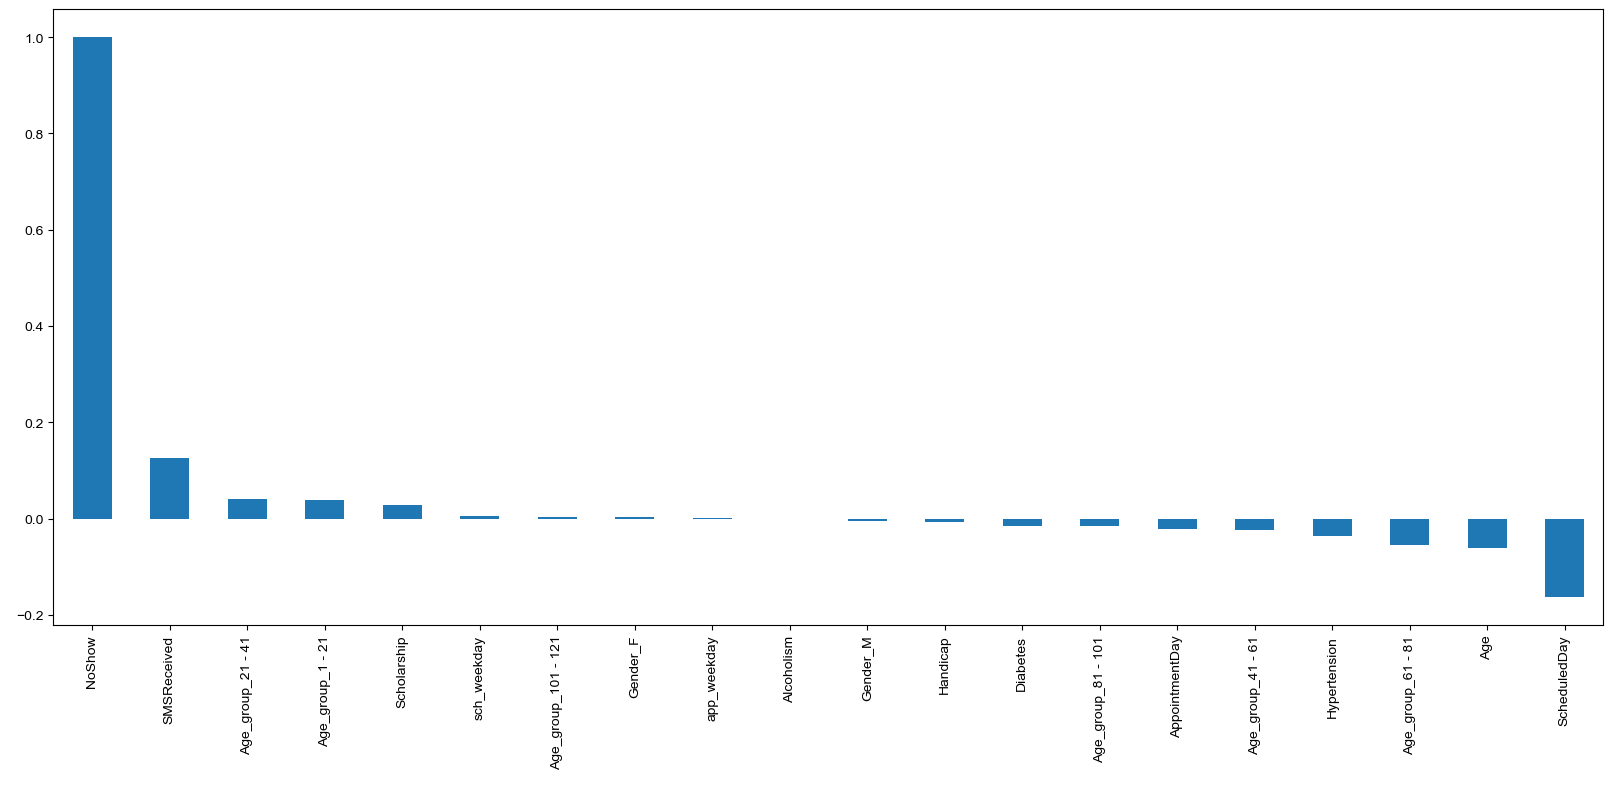

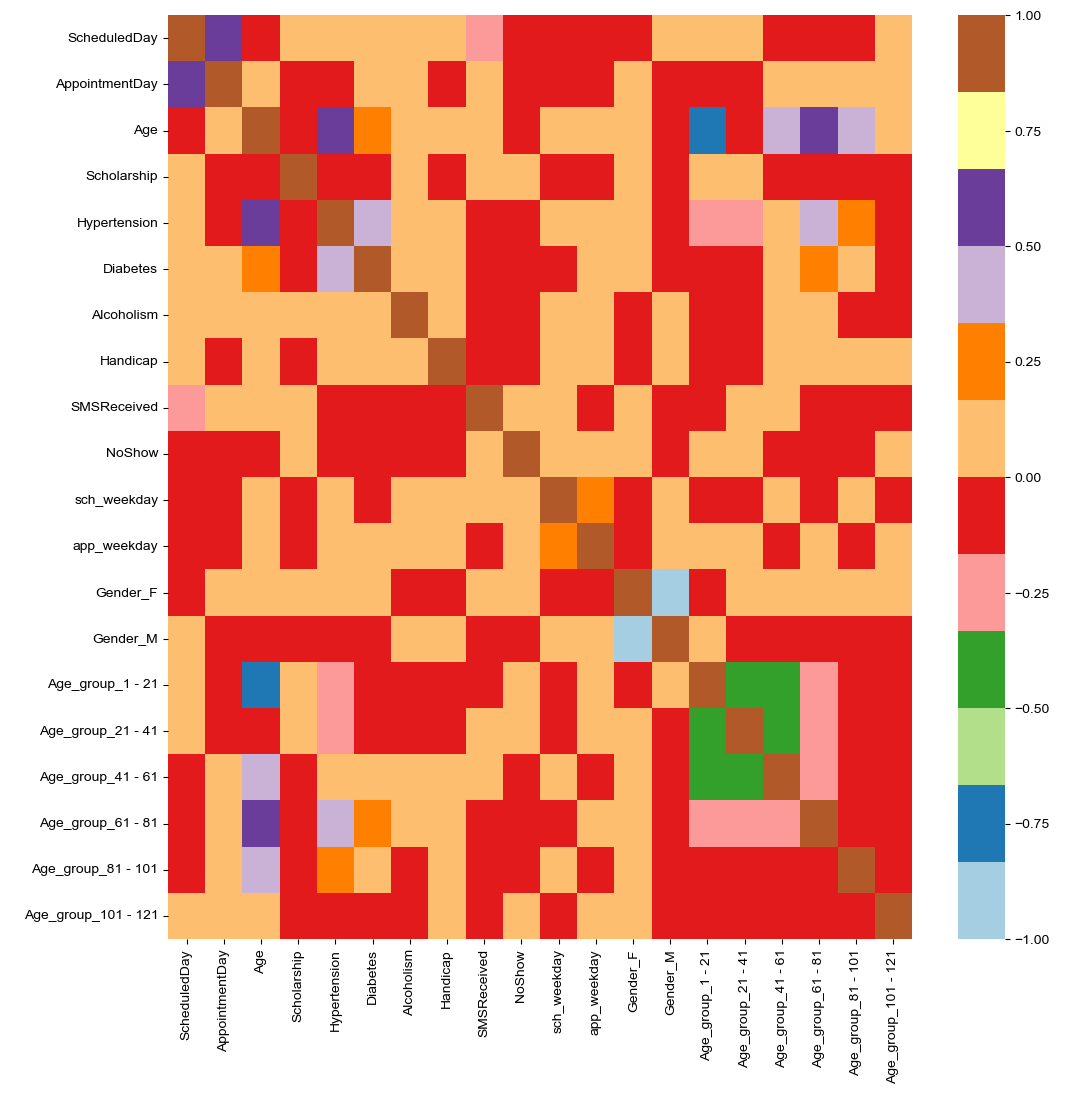

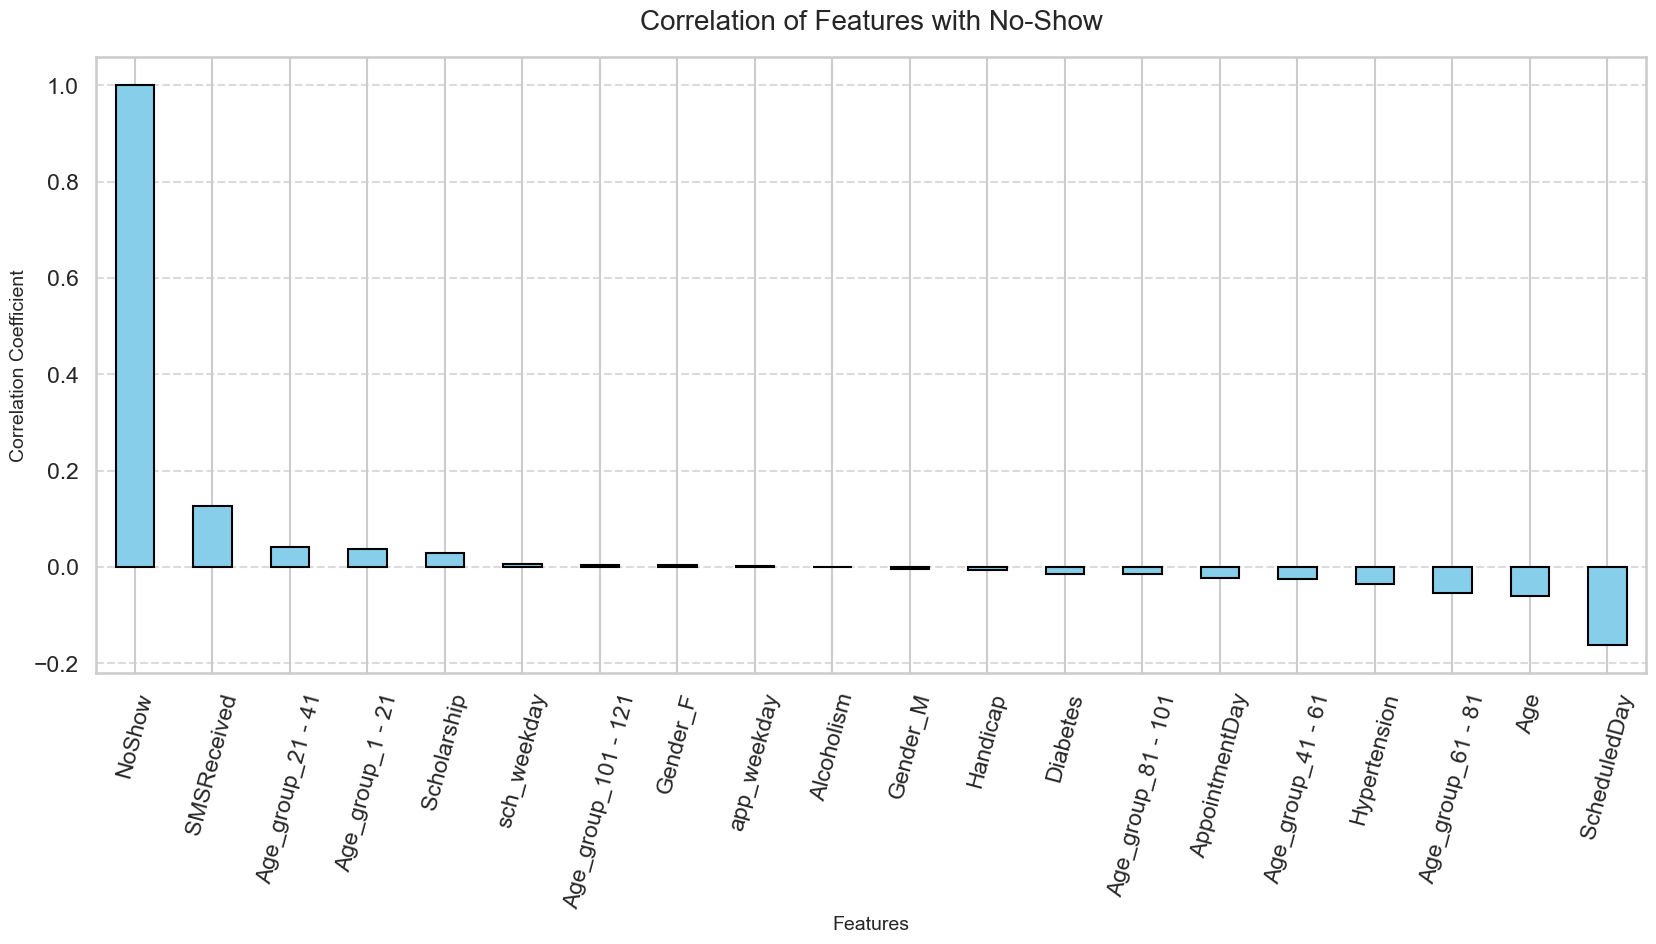

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
corr = base_data_dummies.corr()['NoShow'].sort_values(ascending=False)
corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Features with No-Show', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


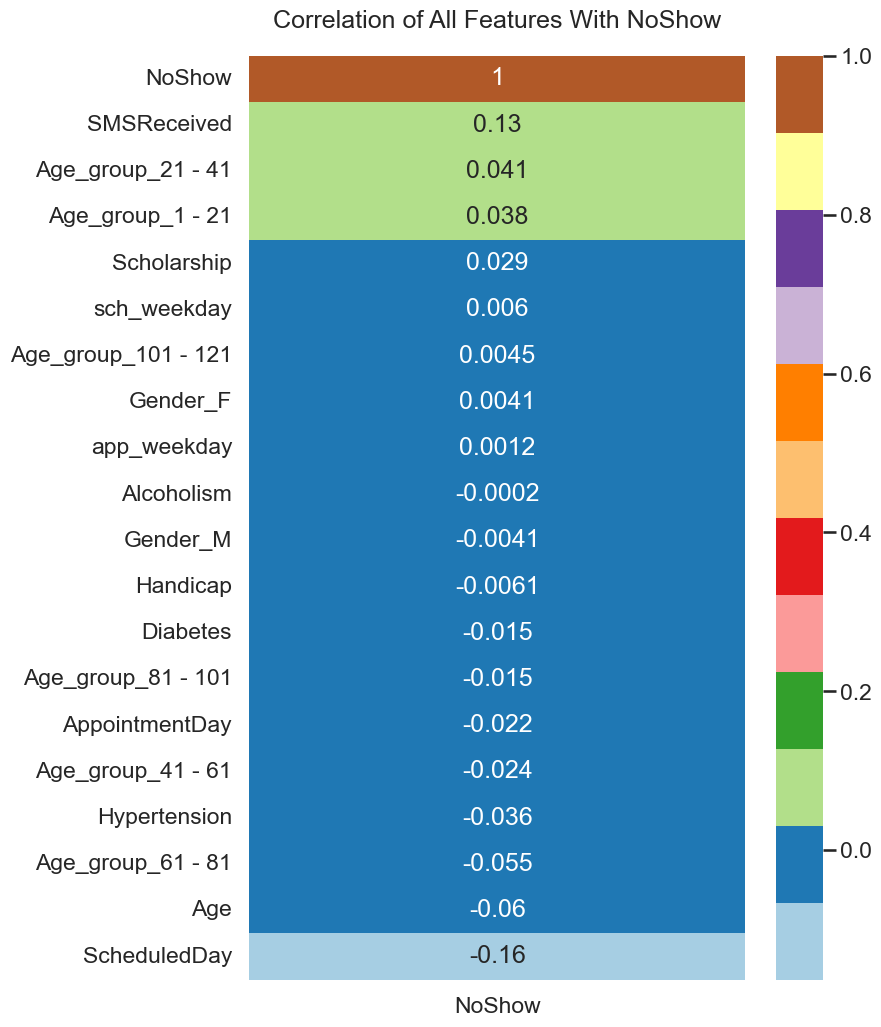

In [42]:
plt.figure(figsize=(8,12))
sns.heatmap(
    base_data_dummies.corr()[['NoShow']].sort_values('NoShow', ascending=False),
    annot=True,
    cmap="Paired"
)
plt.title("Correlation of All Features With NoShow")
plt.show()

## BIVARIATE ANALYSIS

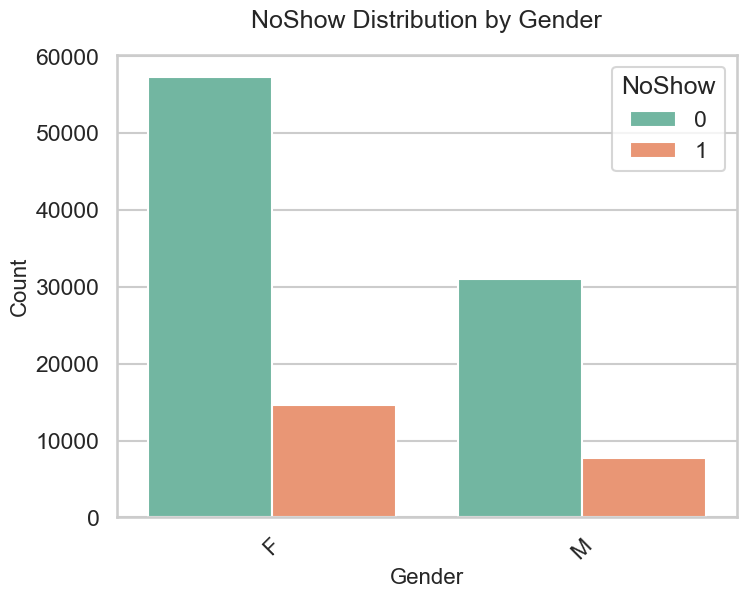

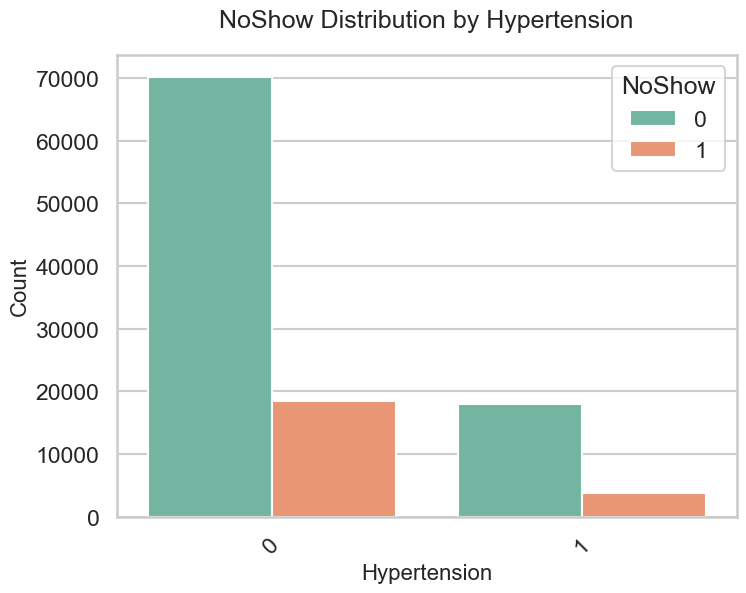

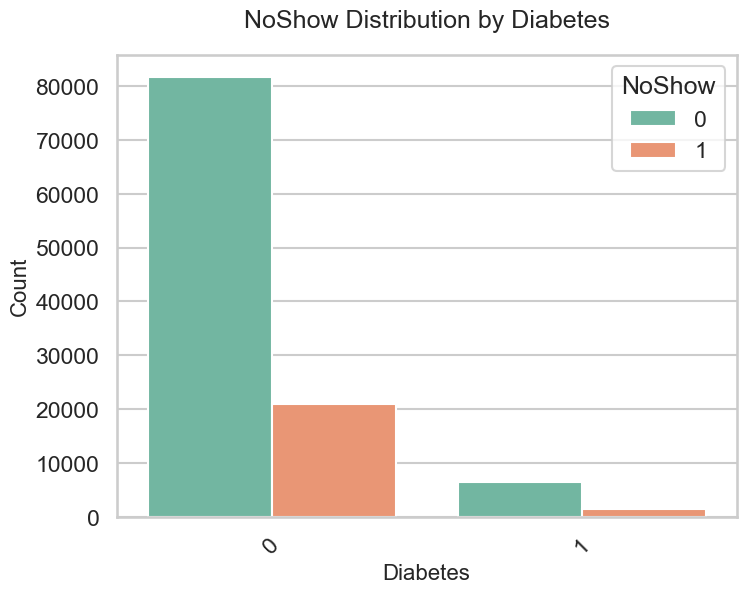

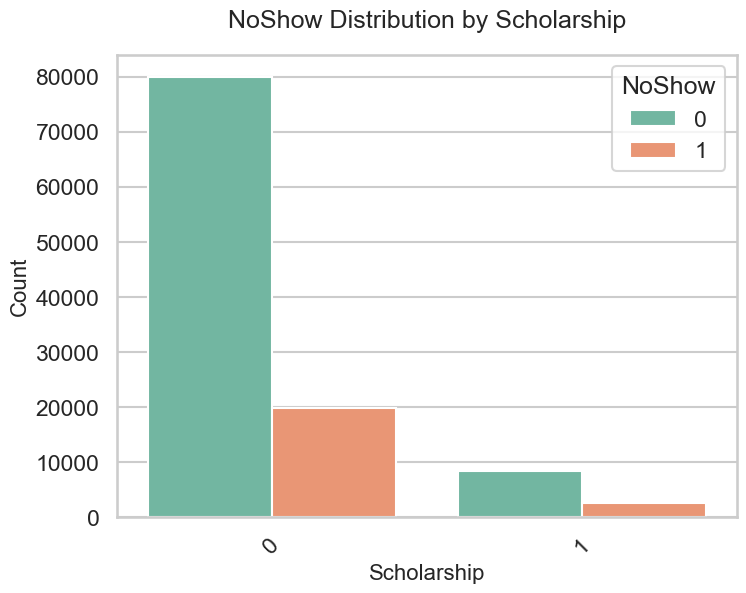

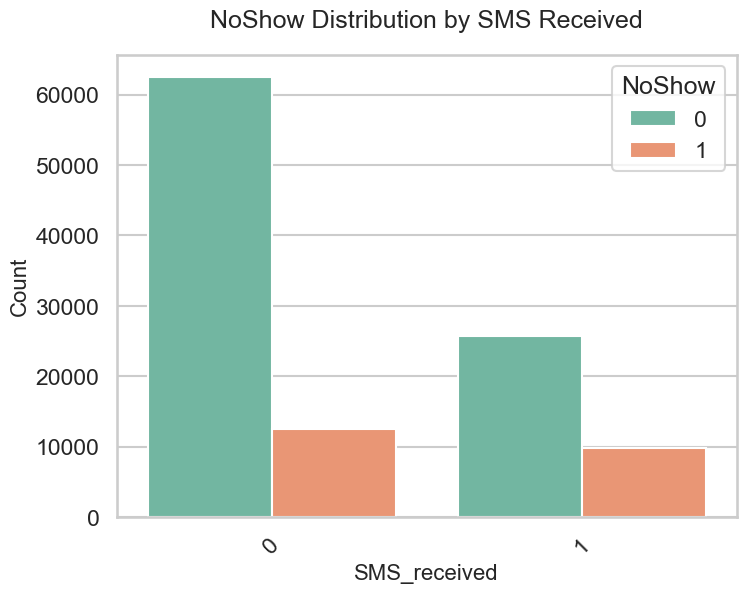

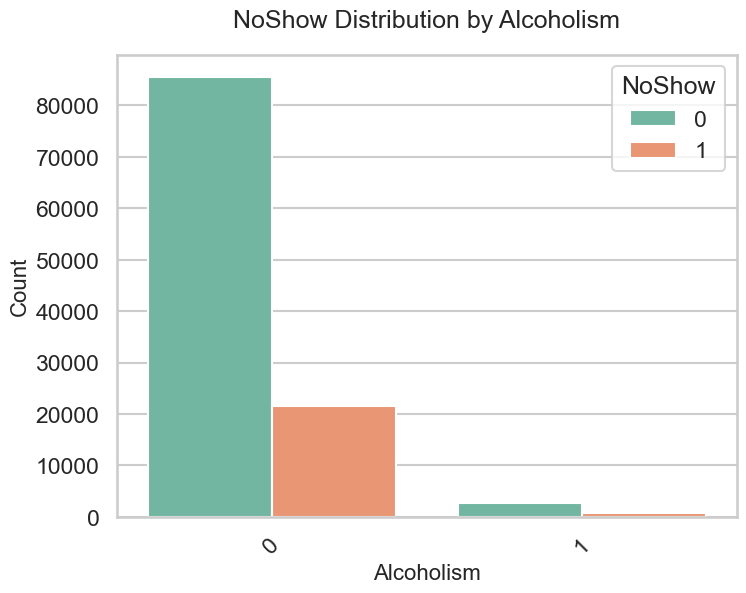

In [62]:

# ---------------------------------------------
# 🧩 Bivariate Analysis (Categorical vs Target)
# ---------------------------------------------

sns.set(style="whitegrid", context="talk")
plt.rcParams["axes.labelsize"] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titlepad'] = 20

# Function for categorical variable bivariate plots
def bivariate_plot(df, x, hue, title, palette="Set2"):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=x, hue=hue, palette=palette)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.show()

# Gender vs NoShow
bivariate_plot(df, 'Gender', 'NoShow', 'NoShow Distribution by Gender')

# Hypertension vs NoShow
bivariate_plot(df, 'Hypertension', 'NoShow', 'NoShow Distribution by Hypertension')

# Diabetes vs NoShow
bivariate_plot(df, 'Diabetes', 'NoShow', 'NoShow Distribution by Diabetes')

# Scholarship vs NoShow
bivariate_plot(df, 'Scholarship', 'NoShow', 'NoShow Distribution by Scholarship')

# SMS Received vs NoShow
bivariate_plot(df, 'SMS_received', 'NoShow', 'NoShow Distribution by SMS Received')

# Alcoholism vs NoShow
bivariate_plot(df, 'Alcoholism', 'NoShow', 'NoShow Distribution by Alcoholism')

# ---------------------------------------------
# 📈 Numerical vs Target (Boxplots)
# ---------------------------------------------

# # Age vs NoShow
# plt.figure(figsize=(8,6))
# sns.boxplot(data=df, x='NoShow', y='Age', palette='coolwarm')
# plt.title('Age vs NoShow')
# plt.xlabel('NoShow (0 = Showed, 1 = Missed)')
# plt.ylabel('Age')
# plt.show()

# # WaitingDays vs NoShow
# plt.figure(figsize=(8,6))
# sns.boxplot(data=df, x='NoShow', y='WaitingDays', palette='viridis')
# plt.title('Waiting Days vs NoShow')
# plt.xlabel('NoShow (0 = Showed, 1 = Missed)')
# plt.ylabel('Days between Scheduling and Appointment')
# plt.show()

# # ---------------------------------------------
# # 🔥 Correlation Heatmap for Numeric Variables
# # ---------------------------------------------

# # ✅ Select only numeric columns before correlation
# plt.figure(figsize=(10,8))
# sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix of Numerical Features")
# plt.show()



# 📈 Numerical vs Target (Boxplots)


C:\Users\Achyuth Kumar\AppData\Local\Temp\ipykernel_7832\1578982678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NoShow', y='Age', palette='coolwarm')


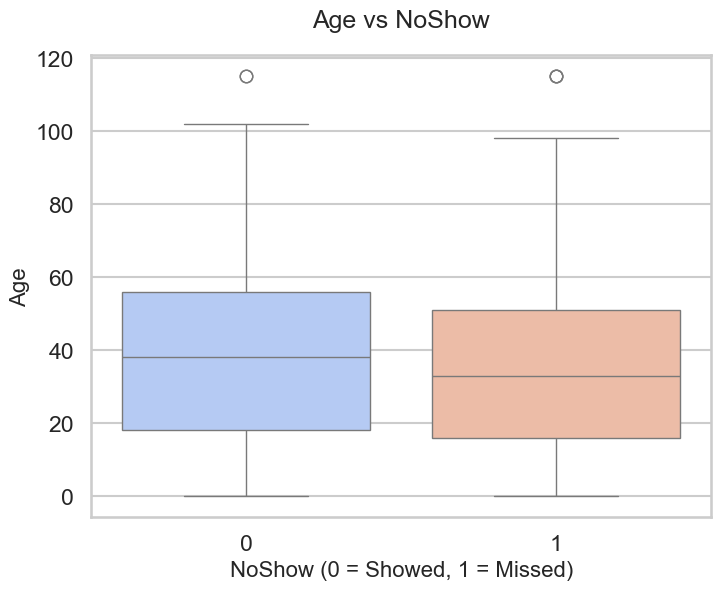

C:\Users\Achyuth Kumar\AppData\Local\Temp\ipykernel_7832\1578982678.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NoShow', y='WaitingDays', palette='viridis')


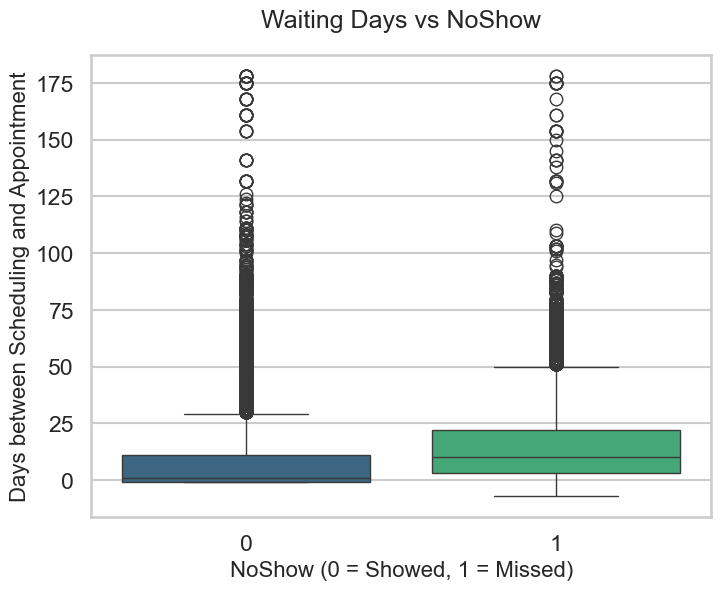

In [61]:
# Age vs NoShow
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='NoShow', y='Age', palette='coolwarm')
plt.title('Age vs NoShow')
plt.xlabel('NoShow (0 = Showed, 1 = Missed)')
plt.ylabel('Age')
plt.show()

# WaitingDays vs NoShow
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='NoShow', y='WaitingDays', palette='viridis')
plt.title('Waiting Days vs NoShow')
plt.xlabel('NoShow (0 = Showed, 1 = Missed)')
plt.ylabel('Days between Scheduling and Appointment')
plt.show()


# Correlation Heatmap for Numeric Variables


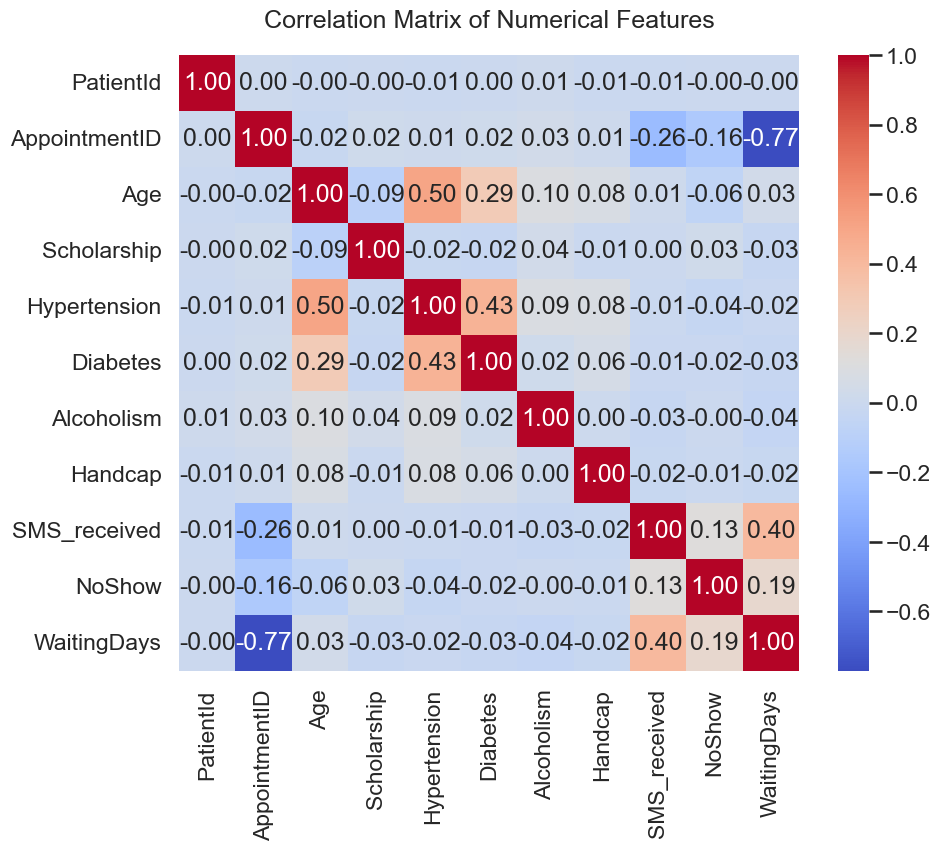

In [60]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Findings
1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8. There is no appointments on sunday and on saturday appointments are very less in comparision to other week days